In [40]:
#The goal of this notebook is to build upon the Model Attempt2 notebook and devlop some minor tweaks to certain regression models
#Import statements
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from scipy.spatial.distance import pdist, squareform
from skbio.stats.distance import mantel
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
# Will explain the libraries, imports, and why they are being used and in what way 
# Refer to documentation 

In [41]:
#CSV files to be used
# Next notebook will aim to merge all the processed data from 
# -> continued: all the supplementary tables worked through

# Will look into labeling and processing the other supplementary
# data next and will implement a similar process and eventually 
# start prepping data for the networkuing based algorithm creation


In [42]:
csvfilePath5 = '/Users/schoudhry/Desktop/Supplementary Tables S5.csv'
csvfilePath6 = '/Users/schoudhry/Desktop/Supplementary Tables S6 S6.csv'
csvfilePath7 = '' # will implement once s5,6,7,8 get touched up 
csvfilePath8 = '/Users/schoudhry/Desktop/Supplementary Tables S8 S8.csv'

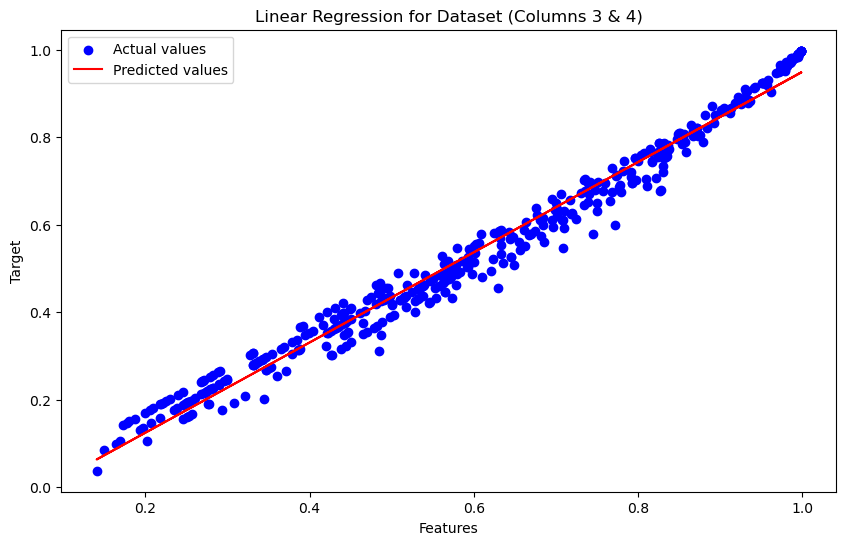

In [43]:
# Load the CSV file into a DataFrame
csv_file_path = '/Users/schoudhry/Desktop/Supplementary Tables S8 S8.csv'
df8 = pd.read_csv(csv_file_path)

# Define the columns of interest
columns_of_interest = [df8.columns[2], df8.columns[3]]
filtered_df = df8[columns_of_interest]

# Ensure the columns are numeric and drop rows with missing values
filtered_df8 = filtered_df.apply(pd.to_numeric, errors='coerce').dropna()

# Prepare the data for linear regression
X = filtered_df8[filtered_df8.columns[:-1]].values
Y = filtered_df8[filtered_df8.columns[-1]].values

# Create and fit the linear regression model
regressor = LinearRegression()
regressor.fit(X, Y)
y_pred = regressor.predict(X)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], Y, color='blue', label='Actual values')
plt.plot(X[:, 0], y_pred, color='red', label='Predicted values')
plt.xlabel('Features')
plt.ylabel('Target')
plt.title('Linear Regression for Dataset (Columns 3 & 4)')
plt.legend()
plt.show()




In [44]:
# Function for linear regression analysis
def linear_regression_analysis(X, Y, y_pred, title):
    if X.shape[0] == 0 or Y.shape[0] == 0:
        print(f"No data available for {title}")
        return
    
    r_squared = r2_score(Y, y_pred)    
    print(f"{title} - R-squared: {r_squared:.2f}")
    #print(f"{title} - Mean Squared Error: {mse:.2f}")

# Perform linear regression analysis
linear_regression_analysis(X, Y, y_pred, 'Linear Regression for Columns 3 & 4')

Linear Regression for Columns 3 & 4 - R-squared: 0.98


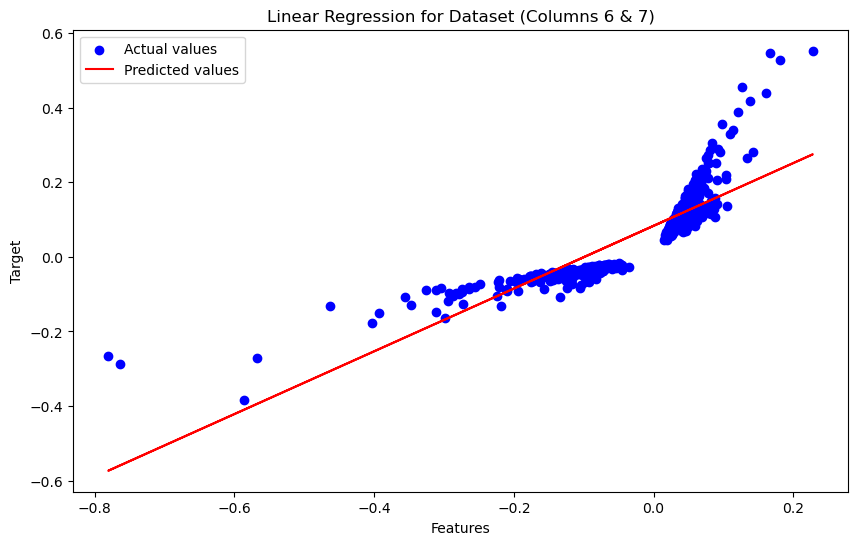

In [45]:
# Load the CSV file into a DataFrame
csv_file_path = '/Users/schoudhry/Desktop/Supplementary Tables S8 S8.csv'
df8 = pd.read_csv(csv_file_path)

# Define the columns of interest
columns_of_interest = [df8.columns[5], df8.columns[6]]
filtered_df = df8[columns_of_interest]

# Ensure the columns are numeric and drop rows with missing values
filtered_df8 = filtered_df.apply(pd.to_numeric, errors='coerce').dropna()

# Prepare the data for linear regression
X = filtered_df8[filtered_df8.columns[:-1]].values
Y = filtered_df8[filtered_df8.columns[-1]].values

# Create and fit the linear regression model
regressor = LinearRegression()
regressor.fit(X, Y)
y_pred = regressor.predict(X)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], Y, color='blue', label='Actual values')
plt.plot(X[:, 0], y_pred, color='red', label='Predicted values')
plt.xlabel('Features')
plt.ylabel('Target')
plt.title('Linear Regression for Dataset (Columns 6 & 7)')
plt.legend()
plt.show()

In [46]:
def linear_regression_analysis(X, Y, y_pred, title):
    if X.shape[0] == 0 or Y.shape[0] == 0:
        print(f"No data available for {title}")
        return
    
    r_squared = r2_score(Y, y_pred)    
    print(f"{title} - R-squared: {r_squared:.2f}")
    #print(f"{title} - Mean Squared Error: {mse:.2f}")

# Perform linear regression analysis
linear_regression_analysis(X, Y, y_pred, 'Linear Regression for Columns 6 & 7')

Linear Regression for Columns 6 & 7 - R-squared: 0.75


In [47]:
# Taken into account the R-Squared value not being as accurate
# Planning to implement a new model
# Non linear model testing

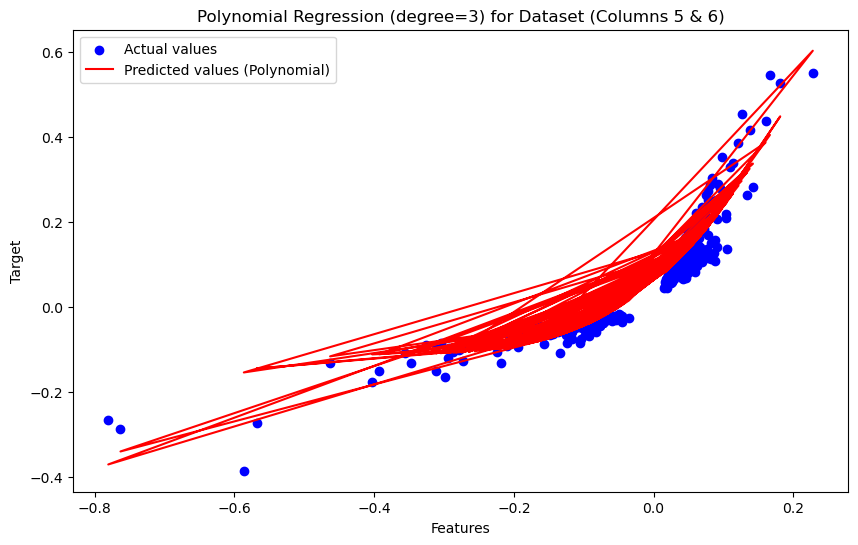

Polynomial Regression (degree=3) - R-squared: 0.92


In [48]:
# Prepare the data for polynomial regression
X = filtered_df8[filtered_df8.columns[:-1]].values
Y = filtered_df8[filtered_df8.columns[-1]].values

# Transform the features to polynomial features
degree = 3  # You can change the degree to a higher value if needed
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

# Create and fit the polynomial regression model
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, Y)
y_poly_pred = poly_regressor.predict(X_poly)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Actual values')
plt.plot(X, y_poly_pred, color='red', label='Predicted values (Polynomial)')
plt.xlabel('Features')
plt.ylabel('Target')
plt.title(f'Polynomial Regression (degree={degree}) for Dataset (Columns 5 & 6)')
plt.legend()
plt.show()

# Evaluate the model
r_squared_poly = r2_score(Y, y_poly_pred)
mse_poly = mean_squared_error(Y, y_poly_pred)

print(f"Polynomial Regression (degree={degree}) - R-squared: {r_squared_poly:.2f}")


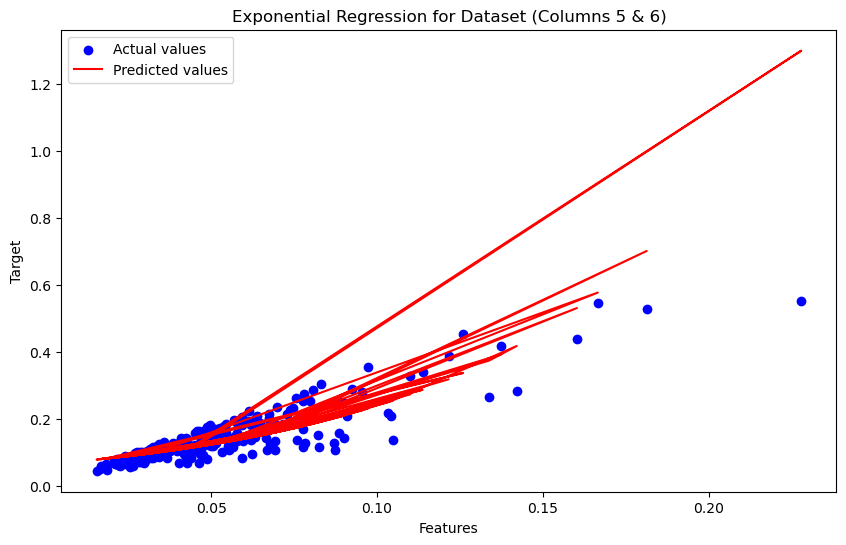

Exponential Regression for Columns 5 & 6 - R-squared: 0.40


In [49]:

# Ensure the columns are numeric and drop rows with missing values
filtered_df8 = filtered_df.apply(pd.to_numeric, errors='coerce').dropna()

# Filter out non-positive values for both the independent and dependent variables
filtered_df8 = filtered_df8[(filtered_df8[columns_of_interest[0]] > 0) & (filtered_df8[columns_of_interest[1]] > 0)]

# Prepare the data for exponential regression
X = filtered_df8[filtered_df8.columns[:-1]].values
Y = filtered_df8[filtered_df8.columns[-1]].values

# Apply the logarithmic transformation to the dependent variable
Y_log = np.log(Y)

# Create and fit the linear regression model on the transformed data
log_regressor = LinearRegression()
log_regressor.fit(X, Y_log)
y_log_pred = log_regressor.predict(X)

# Convert the predictions back to the original scale
y_exp_pred = np.exp(y_log_pred)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], Y, color='blue', label='Actual values')
plt.plot(X[:, 0], y_exp_pred, color='red', label='Predicted values')
plt.xlabel('Features')
plt.ylabel('Target')
plt.title('Exponential Regression for Dataset (Columns 5 & 6)')
plt.legend()
plt.show()

# Function to perform and plot linear regression analysis
def linear_regression_analysis(X, Y, y_pred, title):
    if X.shape[0] == 0 or Y.shape[0] == 0:
        print(f"No data available for {title}")
        return
    
    r_squared = r2_score(Y, y_pred)
    mse = mean_squared_error(Y, y_pred)
    
    print(f"{title} - R-squared: {r_squared:.2f}")

# Perform exponential  regression analysis on the transformed data 
linear_regression_analysis(X, Y, y_exp_pred, 'Exponential Regression for Columns 5 & 6')


In [50]:
# Load the CSV file into a DataFrame
df = pd.read_csv(csvfilePath8)

# Assume the second column is named 'taxa'
second_column_name = df.columns[1]

# Define the sets based on actual values found in the DataFrame
matching_values_set1 = ["Bacteria;Actinobacteria"]
matching_values_set2 = ["Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacteriaceae"]

# Filter the DataFrame to include only rows with matching values from set 1
filtered_df_set1 = df[df[second_column_name].isin(matching_values_set1)]
filtered_df_set2 = df[df[second_column_name].isin(matching_values_set2)]

columns_of_interest = [df.columns[2], df.columns[3]]
filtered_df_set1 = filtered_df_set1[columns_of_interest]
filtered_df_set2 = filtered_df_set2[columns_of_interest]

# Ensure the columns are numeric
filtered_df_set1 = filtered_df_set1.apply(pd.to_numeric, errors='coerce')
filtered_df_set2 = filtered_df_set2.apply(pd.to_numeric, errors='coerce')

# Print the unique values in each column of the filtered DataFrames to identify non-numeric values
print("Unique values in filtered_df_set1 columns:")
for col in filtered_df_set1.columns:
    print(f"{col}: {filtered_df_set1[col].unique()}")

print("\nUnique values in filtered_df_set2 columns:")
for col in filtered_df_set2.columns:
    print(f"{col}: {filtered_df_set2[col].unique()}")

# Drop rows with any NaN values that resulted from coercing to numeric
filtered_df_set1 = filtered_df_set1.dropna()
filtered_df_set2 = filtered_df_set2.dropna()

# Print the shapes of the cleaned DataFrames to debug
print("Shape of cleaned filtered_df_set1:", filtered_df_set1.shape)
print("Shape of cleaned filtered_df_set2:", filtered_df_set2.shape)

# Check if both DataFrames have data
if filtered_df_set1.shape[0] > 0 and filtered_df_set2.shape[0] > 0:
    # Calculate the distance matrices
    dist_matrix_set1 = pdist(filtered_df_set1, metric='euclidean')
    dist_matrix_set2 = pdist(filtered_df_set2, metric='euclidean')

    # Perform the Mantel test using skbio's mantel function
    mantel_test_result = mantel(dist_matrix_set1, dist_matrix_set2, method='pearson', permutations=999)
    print("Mantel test result:", mantel_test_result)
else:
    print("One or both of the filtered data sets are empty, unable to perform Mantel test.")


Unique values in filtered_df_set1 columns:
Unnamed: 2: [0.9623305 0.8369678 0.9224066 0.7976339 0.5781025 0.7242185 0.6087358
 0.3684566]
Unnamed: 3: [0.904114  0.771755  0.8913692 0.7017762 0.5077863 0.6139059 0.5786386
 0.3198764]

Unique values in filtered_df_set2 columns:
Unnamed: 2: []
Unnamed: 3: []
Shape of cleaned filtered_df_set1: (8, 2)
Shape of cleaned filtered_df_set2: (0, 2)
One or both of the filtered data sets are empty, unable to perform Mantel test.


In [51]:

print(filtered_df8.columns)


Index(['Unnamed: 5', 'Unnamed: 6'], dtype='object')


/Users/schoudhry/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


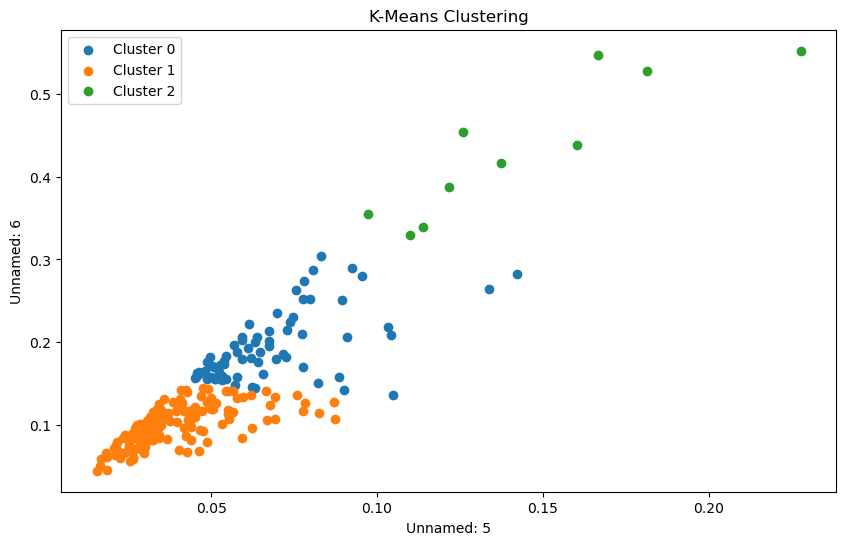

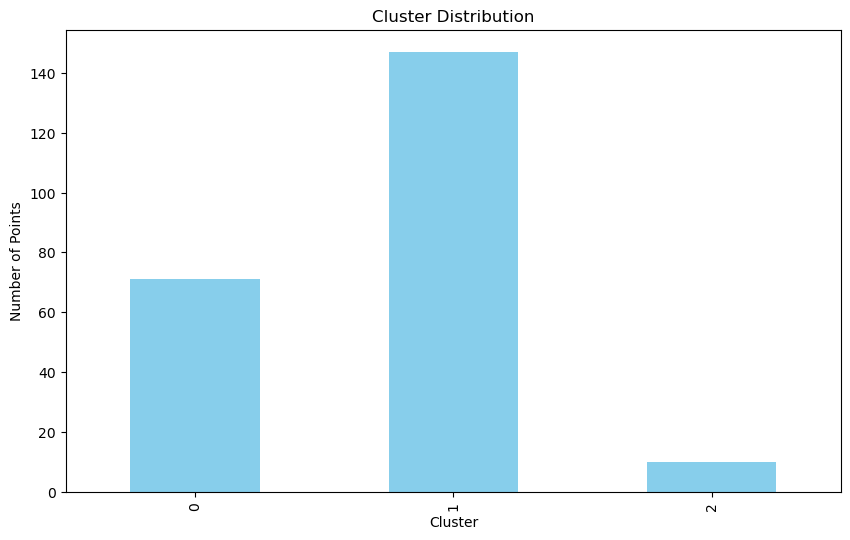

Silhouette Score: 0.56
Predicted next values based on cluster means: Unnamed: 5    0.083601
Unnamed: 6    0.242644
dtype: float64


In [52]:
# Assuming columns_of_interest should be updated based on the actual column names
columns_of_interest = [df8.columns[5], df8.columns[6]]

filtered_df8 = filtered_df8.apply(pd.to_numeric, errors='coerce').dropna()
filtered_df8 = filtered_df8[(filtered_df8[columns_of_interest[0]] > 0) & (filtered_df8[columns_of_interest[1]] > 0)]

# Prepare the data for clustering
X = filtered_df8.values

# Apply K-Means Clustering
num_clusters = 3  # You can adjust the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
clusters = kmeans.fit_predict(X)

# Add the cluster information to the DataFrame
filtered_df8['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_data = filtered_df8[filtered_df8['Cluster'] == cluster]
    plt.scatter(cluster_data[columns_of_interest[0]], cluster_data[columns_of_interest[1]], label=f'Cluster {cluster}')

plt.xlabel(columns_of_interest[0])
plt.ylabel(columns_of_interest[1])
plt.title('K-Means Clustering')
plt.legend()
plt.show()

# Bar chart visualization
cluster_counts = filtered_df8['Cluster'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.title('Cluster Distribution')
plt.show()

# Calculate and print silhouette score
silhouette_avg = silhouette_score(X, clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Function to predict the next values based on the mean of each cluster
def predict_next_values(df, clusters):
    cluster_means = df.groupby('Cluster').mean()
    next_values = cluster_means.mean(axis=0)
    return next_values

next_values = predict_next_values(filtered_df8, clusters)
print(f"Predicted next values based on cluster means: {next_values}")
